### **Importing Libraries**

Before begin our analysis, we need to import all the necessary Python libraries. These libraries provide the tools for data manipulation, visualization, model training, and evaluation, ensuring our project is comprehensive and efficient.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, root_mean_squared_error, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor  
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### **Loading the Dataset**

This project begins by loading the Calories.csv file into a pandas DataFrame. This action is essential for all subsequent data manipulation and model-building tasks.

In [2]:
df = pd.read_csv("Calories.csv")

### Initial Data Exploration and Analysis**

This section begins the hands-on analysis of the dataset. The goal is to gain an initial understanding of the data's structure, identify data types, check for missing values, and review key statistical summaries. This process help to uncover patterns and potential issues before we begin modeling.

In [3]:
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [6]:
df.drop('User_ID',axis=1,inplace=True)

In [7]:
df.columns

Index(['Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

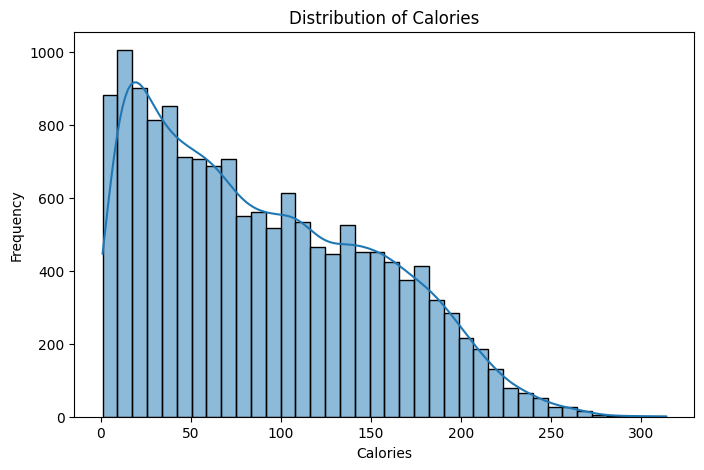

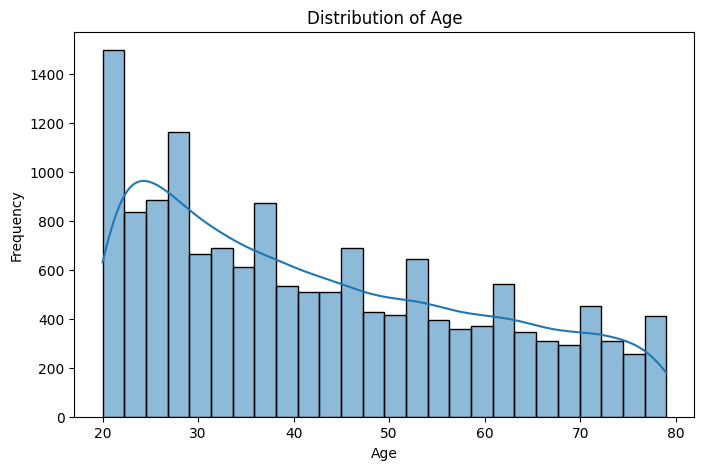

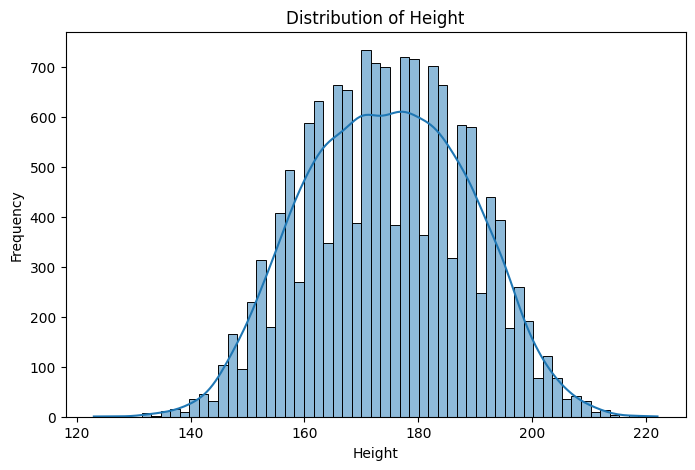

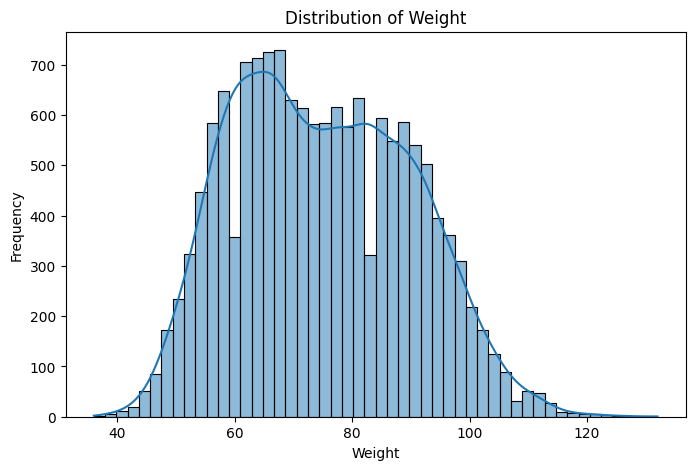

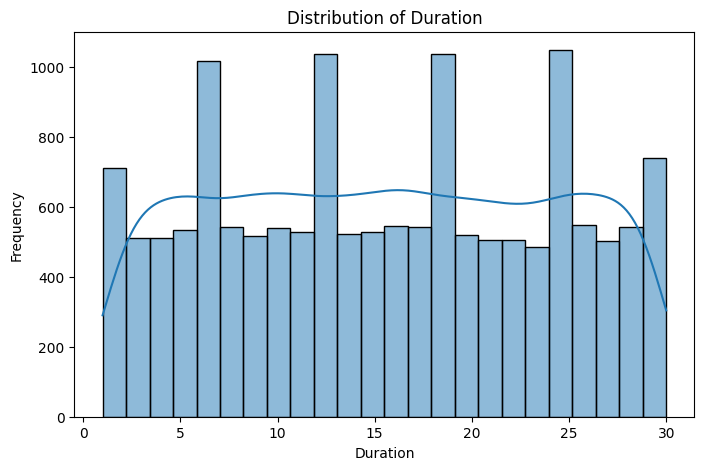

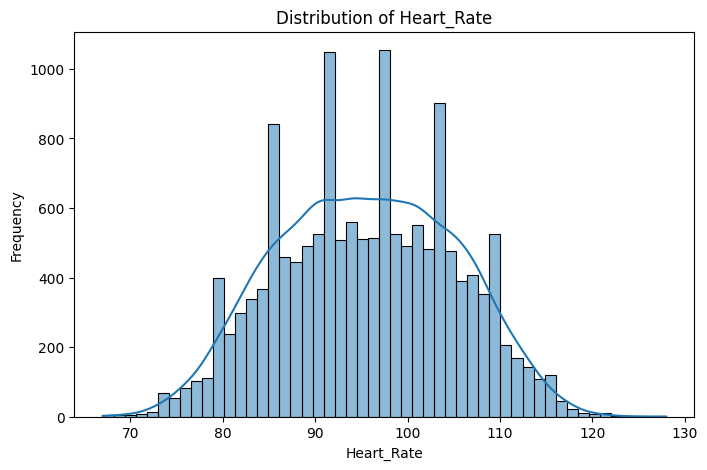

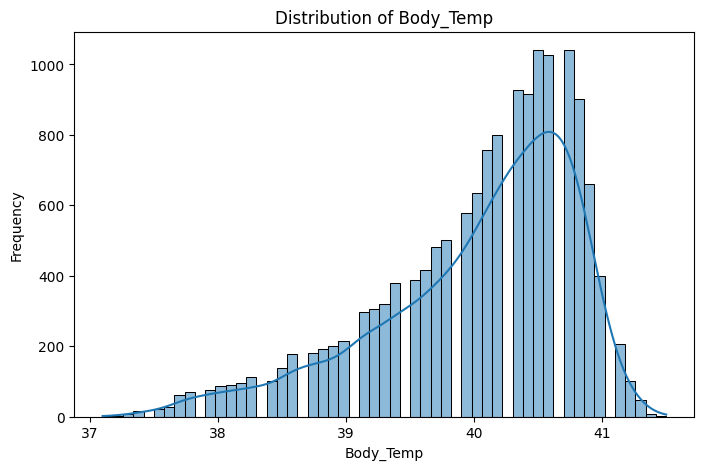

In [8]:
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 5)) 
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

array([[<Axes: title={'center': 'Calories'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Duration'}>,
        <Axes: title={'center': 'Heart_Rate'}>],
       [<Axes: title={'center': 'Body_Temp'}>, <Axes: >, <Axes: >]],
      dtype=object)

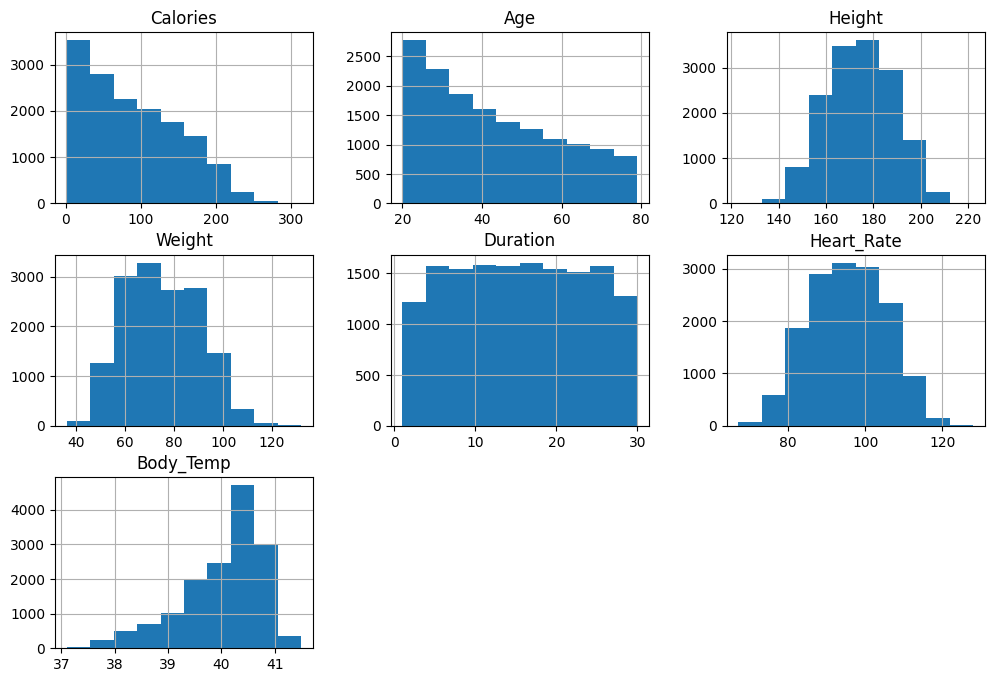

In [9]:
df.hist(figsize=(12, 8))  # Bandingkan distribusinya secara visual


### **Handling Missing Values** 

Handling missing data points. A strategy is applied to fill null values using either the mean, median, or mode, ensuring the dataset is complete and ready for analysis.

In [10]:
c = 0

for a in df.columns:
    if df[a].isnull().sum()==0:
        c=c+1
    else:
        print(a, df[a].isnull().sum(), df[a].dtype)

if c==len(df.columns):
    print('Tidak ada missing value')
else:
    print('Ada missing value')

Tidak ada missing value


In [11]:
row_df = df.shape[0]

for i in df.columns:
    if df[i].isnull().sum() == 0:
        continue
    elif df[i].dtype=='int64' or df[i].dtype=='float64':
        if (50/100)*(row_df) < df[i].isnull().sum():
            df.drop(i,axis=1,inplace=True)
        elif df[i].skew() < -0.5 or df[i].skew() > 0.5:
            df[i] = df[i].fillna(df[i].median())
        else:
            df[i] = df[i].fillna(df[i].mean())
    else:
        df[i].fillna(df[i].mode()[0], inplace=True)
        if df[i].isnull().sum()>0:
            df.drop(i,axis=1,inplace=True)
            


In [12]:
if df.duplicated().sum()==0:
    print('Tidak ada duplicate')
else:
    print('Ada duplicate')

Ada duplicate


In [13]:
df.drop_duplicates(keep='first',inplace=True)

In [14]:
if df.duplicated().sum()==0:
    print('Tidak ada duplicate')
else:
    print('Ada duplicate')

Tidak ada duplicate


### **Categorical Feature Encoding**
Prepares categorical data for the model by converting it into a numerical format using a LabelEncoder.

In [15]:
categorical_columns = [col for col in df.columns if df[col].dtype=='object']
print(categorical_columns)
print(len(categorical_columns))

['Gender']
1


In [16]:
print(df['Gender'].unique())

['male' 'female']


In [17]:
encoder = LabelEncoder()
encoded = {}

for col in df.columns:
    if df[col].dtype=='object':
        df[col]=encoder.fit_transform(df[col])
        encoded[col] = {i : class_name for i, class_name in enumerate(encoder.classes_)}

for column, value in encoded.items():
    print(f"Column: {column}")
    for i,class_name in value.items():
        print(f" {i} -> {class_name}")
        print('-'*30)

Column: Gender
 0 -> female
------------------------------
 1 -> male
------------------------------


In [18]:
print(df["Gender"].unique())
print(df["Gender"].isna().sum())


[1 0]
0


In [19]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

### **Feature Relationship Visualization**
Visualizes the relationship between each feature and the 'Calories' target variable using scatter plots.

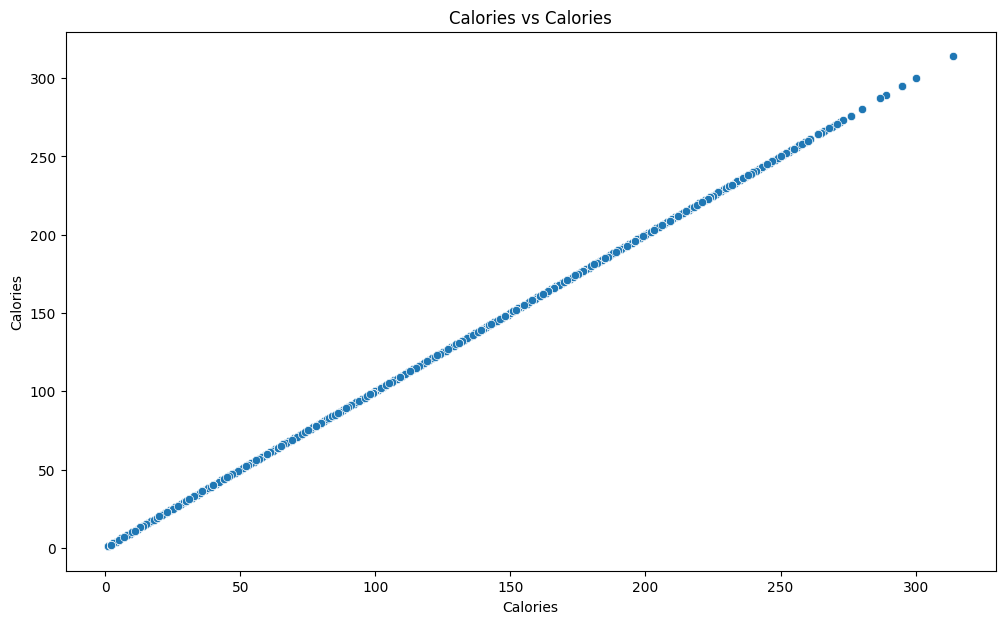

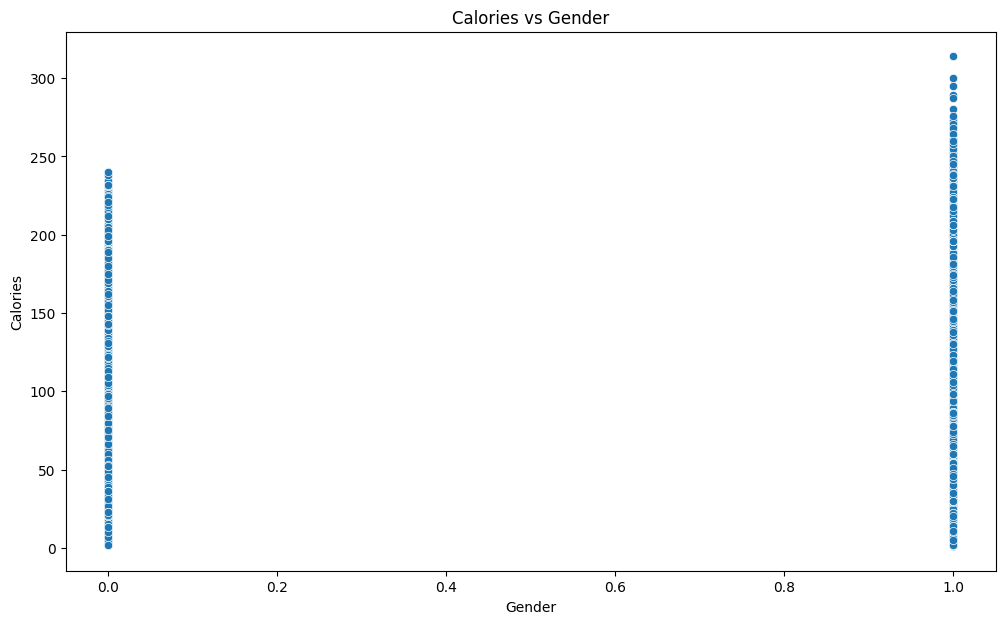

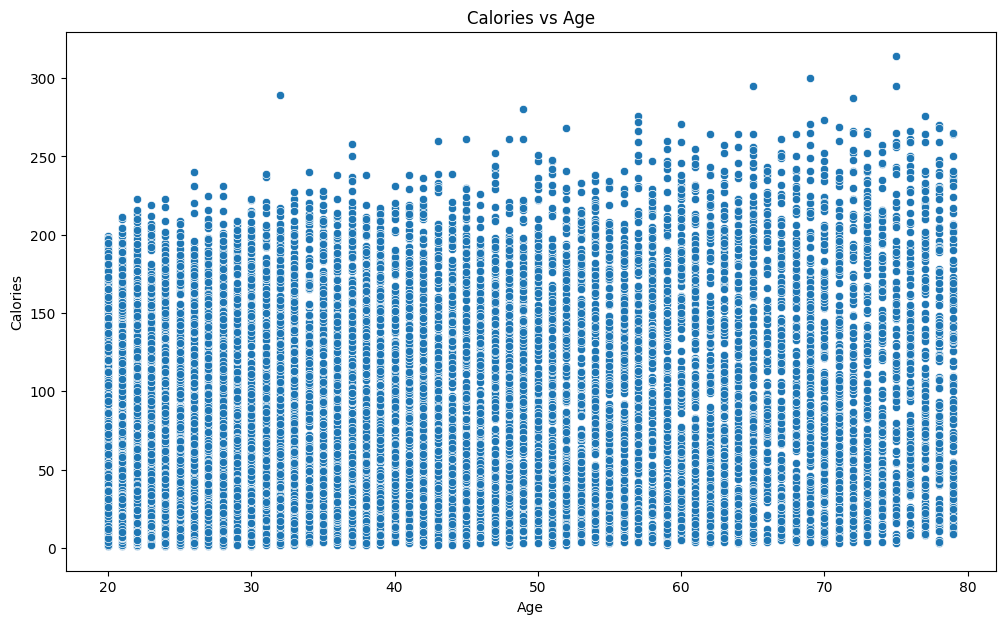

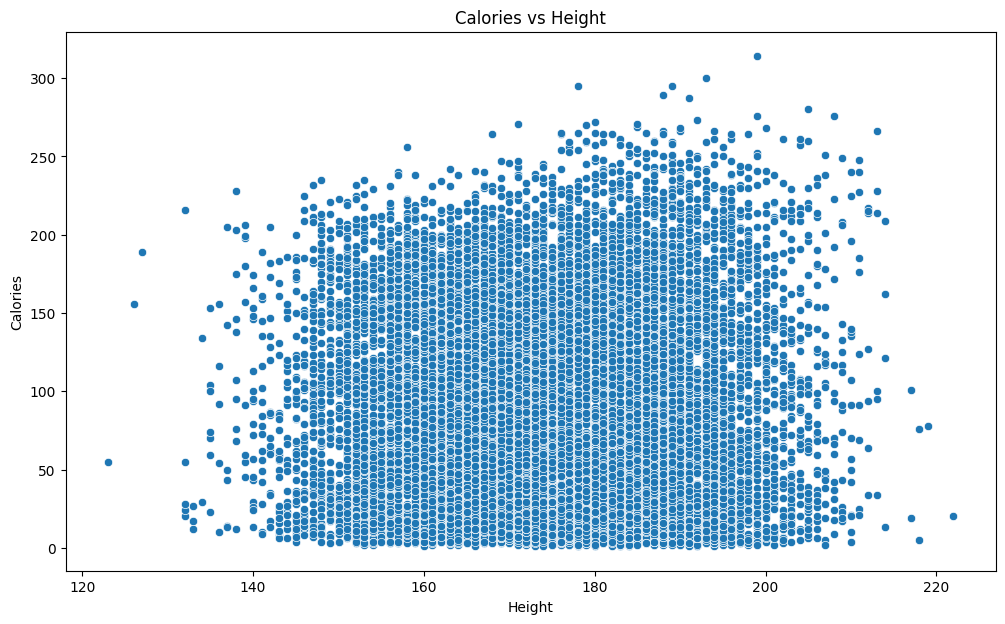

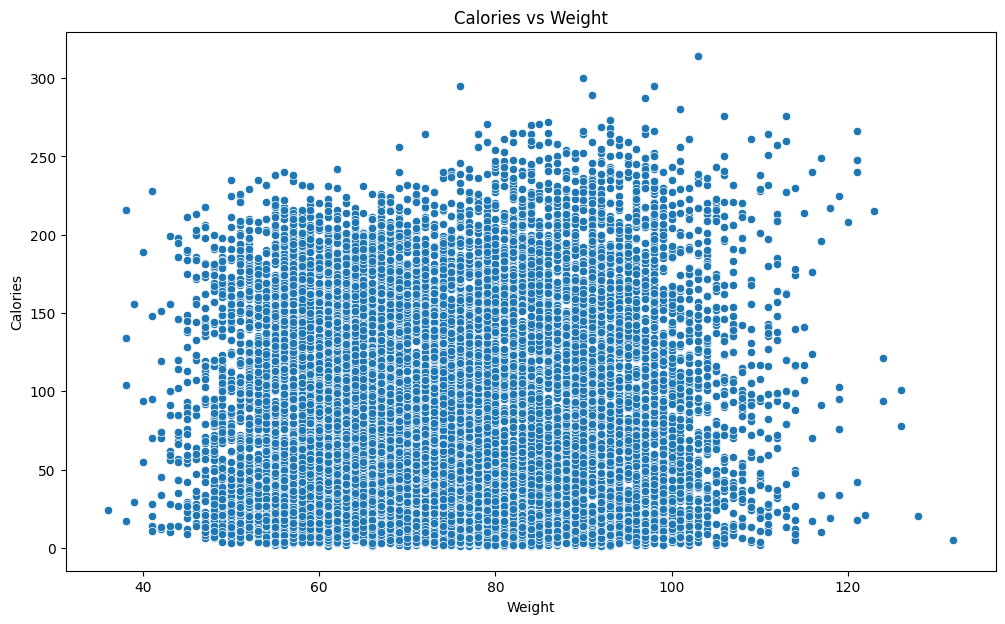

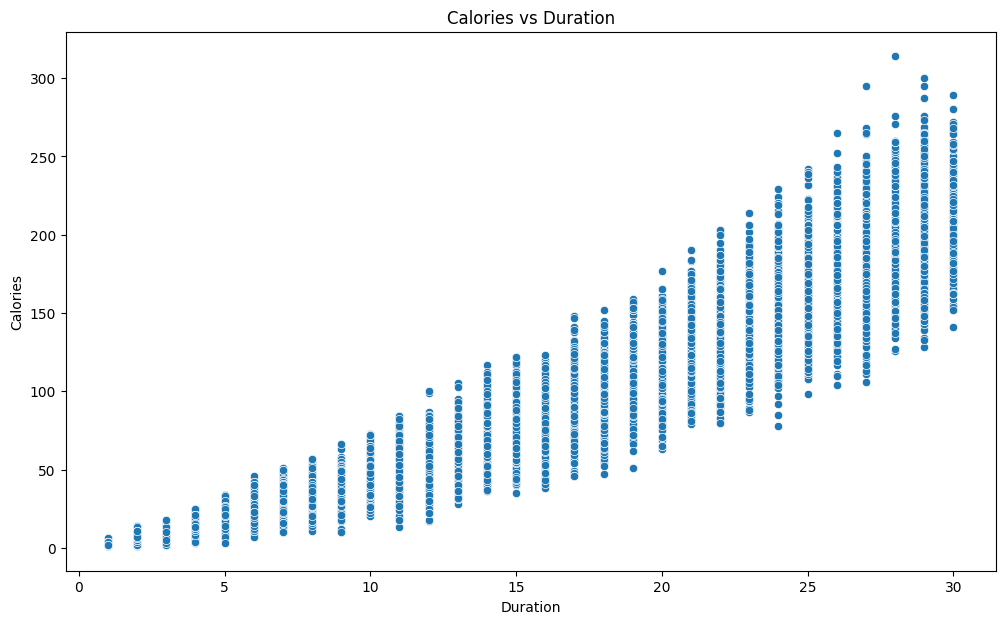

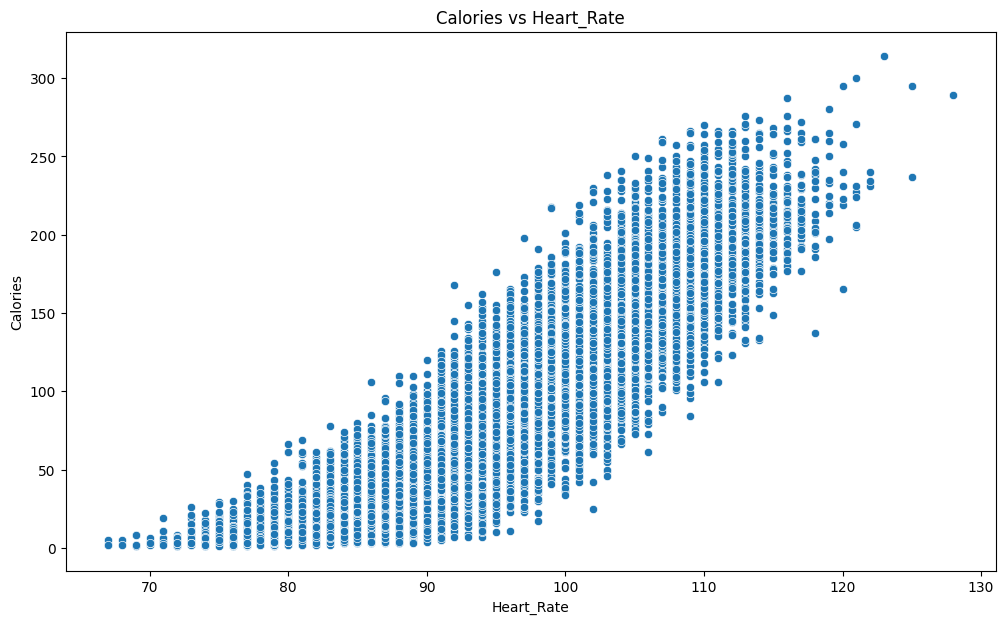

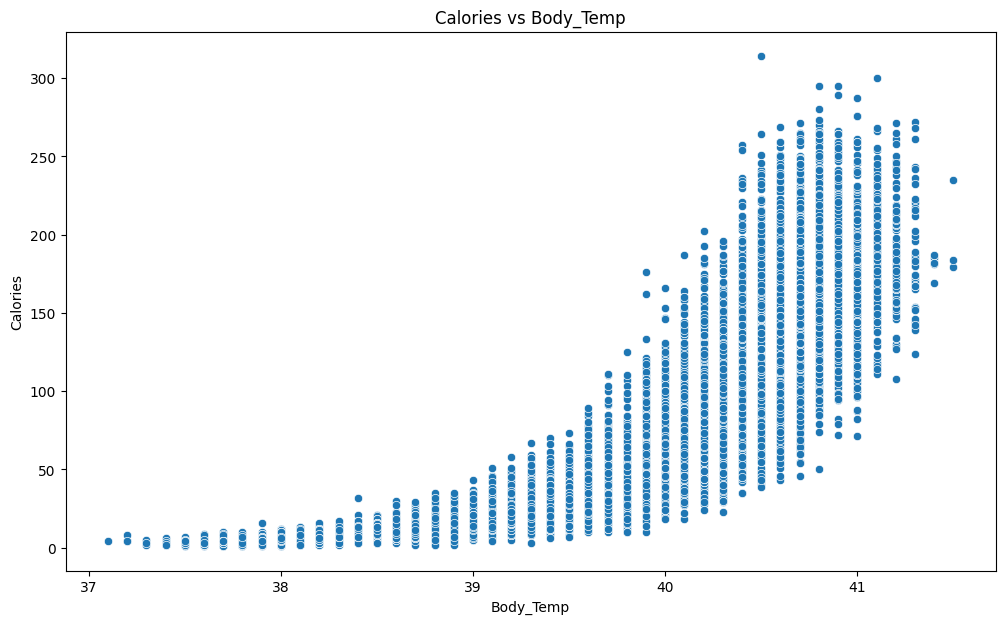

In [20]:
for col in df.columns:
    plt.figure(figsize=(12,7))
    sns.scatterplot(data=df, x=col, y='Calories')
    plt.title(f'Calories vs {col}')
    plt.show()

### **Correlation Analysis**
A correlation matrix is computed to quantify the linear relationships between all variables. The heatmap visualizes these relationships, which is a crucial step for identifying features strongly correlated with the 'Calories' target.

In [21]:
correlation_matrix = df.corr()
feature_and_target = []

for a in df.columns:
    if abs(correlation_matrix.loc[a,'Calories'])>0.5:
        print(correlation_matrix.loc[a,'Calories'])
        print(a)
        feature_and_target.append(a)

1.0
Calories
0.9554186847933576
Duration
0.8978803645651383
Heart_Rate
0.8245518892140588
Body_Temp


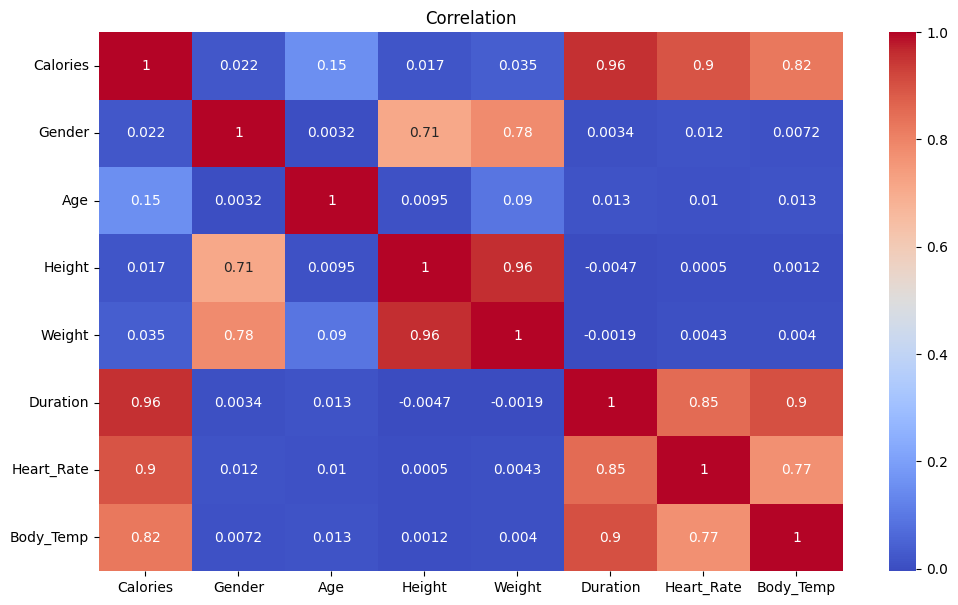

In [22]:
plt.figure(figsize=(12,7))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title(f'Correlation')
plt.show()

In [23]:
correlation_matrix = df.corr()
feature_and_target = []

for a in df.columns:
    if abs(correlation_matrix.loc[a,'Calories'])>0.5:
        print(correlation_matrix.loc[a,'Calories'])
        print(a)
        feature_and_target.append(a)

1.0
Calories
0.9554186847933576
Duration
0.8978803645651383
Heart_Rate
0.8245518892140588
Body_Temp


In [24]:
print(df['Calories'].sort_values(ascending=False))

428      314.0
6240     300.0
3357     295.0
13871    295.0
9981     289.0
         ...  
2732       1.0
9755       1.0
2705       1.0
8671       1.0
3873       1.0
Name: Calories, Length: 14999, dtype: float64


In [25]:
pairs = []

for b in df.columns:
    if b=='Calories':
        continue
    for c in df.columns:
        if b==c:
            continue
        if abs(correlation_matrix.loc[b,c])>0.7:
            pairs.append((b,c,correlation_matrix.loc[b,c]))

In [26]:
pairs

[('Gender', 'Height', np.float64(0.7105217390950366)),
 ('Gender', 'Weight', np.float64(0.783171094314947)),
 ('Height', 'Gender', np.float64(0.7105217390950366)),
 ('Height', 'Weight', np.float64(0.9584520586082743)),
 ('Weight', 'Gender', np.float64(0.783171094314947)),
 ('Weight', 'Height', np.float64(0.9584520586082743)),
 ('Duration', 'Calories', np.float64(0.9554186847933576)),
 ('Duration', 'Heart_Rate', np.float64(0.8528657108042402)),
 ('Duration', 'Body_Temp', np.float64(0.9031638753263225)),
 ('Heart_Rate', 'Calories', np.float64(0.8978803645651383)),
 ('Heart_Rate', 'Duration', np.float64(0.8528657108042402)),
 ('Heart_Rate', 'Body_Temp', np.float64(0.7715228854876123)),
 ('Body_Temp', 'Calories', np.float64(0.8245518892140588)),
 ('Body_Temp', 'Duration', np.float64(0.9031638753263225)),
 ('Body_Temp', 'Heart_Rate', np.float64(0.7715228854876123))]

In [27]:
print(correlation_matrix.loc['Height','Calories'])

0.017498632311324154


### **Outlier Detection**
This section visualizes the distribution of each numerical feature to identify outliers. Using box plots, the code helps to visually spot data points that fall far outside the typical range, which is an important step in data cleaning and can help improve model accuracy.


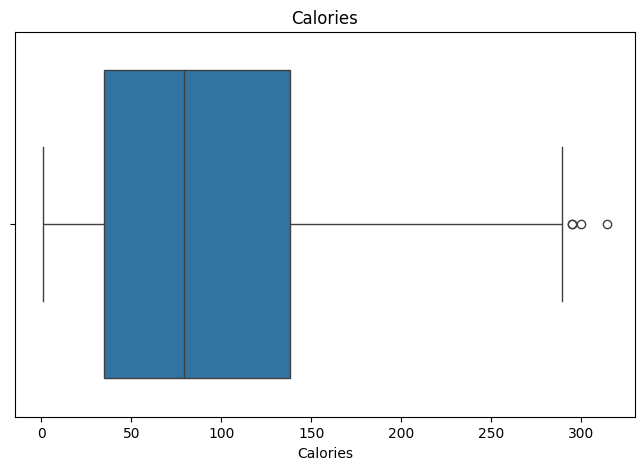

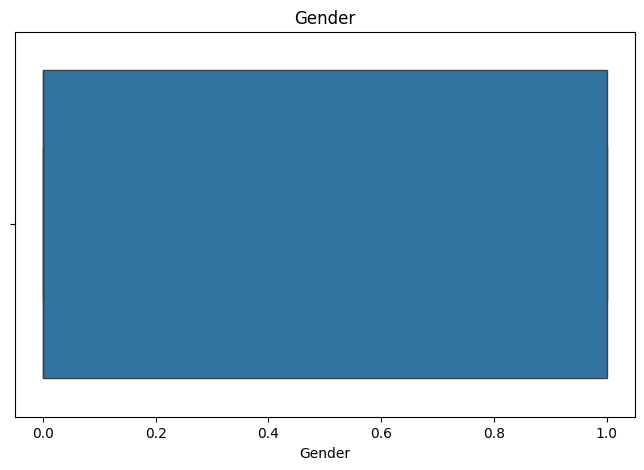

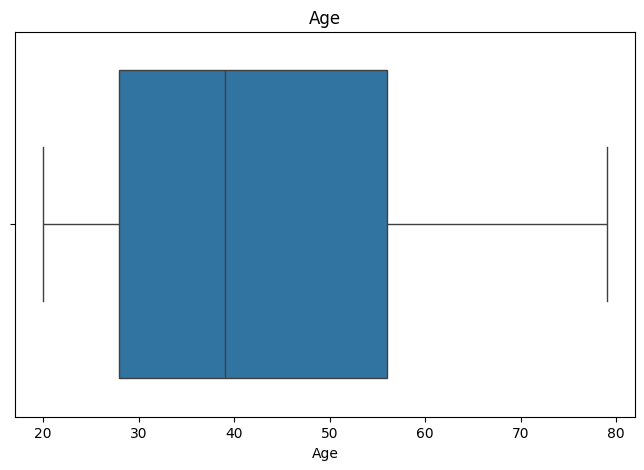

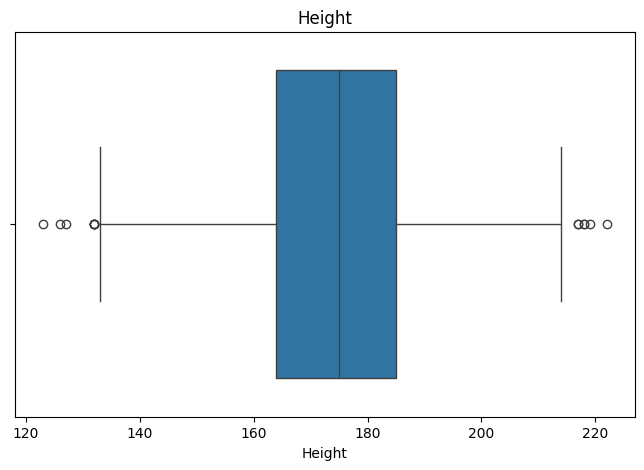

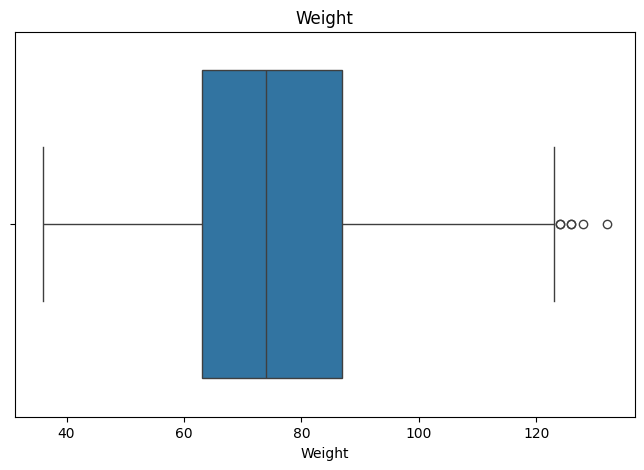

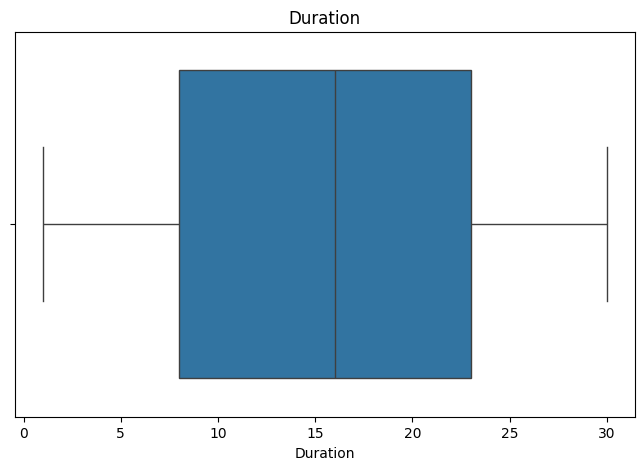

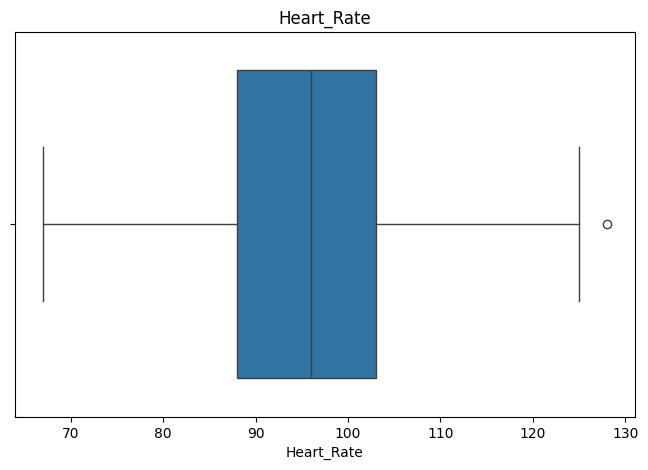

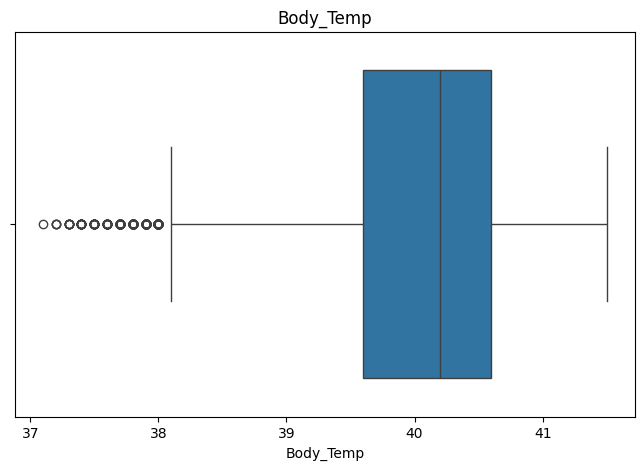

In [28]:
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    if df[column].nunique() > 1:  
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[column])
        plt.title(f'{column}')
        plt.xlabel(column)
        plt.show()
    else:
        print(f"Skipping {column}, only one unique value")


In [29]:
def detect_outlier(data):
    outlier_count = {}
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier = data[(data[col]<lower_bound)|(data[col]>upper_bound)]
        outlier_count[col] = len(outlier)
    return outlier_count
    
outlier_in_data = detect_outlier(df)
for column,count in outlier_in_data.items():
    print(f"Column '{column}' has {count} outliers")

Column 'Calories' has 4 outliers
Column 'Gender' has 0 outliers
Column 'Age' has 0 outliers
Column 'Height' has 14 outliers
Column 'Weight' has 6 outliers
Column 'Duration' has 0 outliers
Column 'Heart_Rate' has 1 outliers
Column 'Body_Temp' has 369 outliers


### **Outlier Handling**
A function is defined to handle outliers. The code uses the Interquartile Range (IQR) method to identify and clip outlier values, ensuring that the data is within a more consistent range for model training.

In [30]:
def clip_outlier(data):
    df_clipped  = data.copy()
    for col in df.columns:
        if col == 'Calories':
            continue
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clipped[col] = data[col].clip(lower=lower_bound,upper=upper_bound)
    return df_clipped

df_after_clip = clip_outlier(df)
print(df_after_clip)

       Calories  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0         231.0       1   68   190.0    94.0      29.0       105.0       40.8
1          66.0       0   20   166.0    60.0      14.0        94.0       40.3
2          26.0       1   69   179.0    79.0       5.0        88.0       38.7
3          71.0       0   34   179.0    71.0      13.0       100.0       40.5
4          35.0       0   27   154.0    58.0      10.0        81.0       39.8
...         ...     ...  ...     ...     ...       ...         ...        ...
14995      45.0       0   20   193.0    86.0      11.0        92.0       40.4
14996      23.0       0   27   165.0    65.0       6.0        85.0       39.2
14997      75.0       0   43   159.0    58.0      16.0        90.0       40.1
14998      11.0       1   78   193.0    97.0       2.0        84.0       38.3
14999      98.0       1   63   173.0    79.0      18.0        92.0       40.5

[14999 rows x 8 columns]


In [31]:
outlier_in_dataa = detect_outlier(df_after_clip)
for column,count in outlier_in_dataa.items():
    print(f"Column '{column}' has {count} outliers")

Column 'Calories' has 4 outliers
Column 'Gender' has 0 outliers
Column 'Age' has 0 outliers
Column 'Height' has 0 outliers
Column 'Weight' has 0 outliers
Column 'Duration' has 0 outliers
Column 'Heart_Rate' has 0 outliers
Column 'Body_Temp' has 0 outliers


### **Data Cleaning and Transformation**
This section cleans and transforms the dataset by handling missing values and encoding categorical features. These steps ensure the data is in a format suitable for model training.

In [32]:
df['Heart_Rate'].fillna(df['Heart_Rate'].median(), inplace=True)
df['Body_Temp'].fillna(df['Body_Temp'].median(), inplace=True)


C:\Users\colin\AppData\Local\Temp\ipykernel_15552\3537892304.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Heart_Rate'].fillna(df['Heart_Rate'].median(), inplace=True)
C:\Users\colin\AppData\Local\Temp\ipykernel_15552\3537892304.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [ ]:

if 'Heart_Rate' not in df.columns:
    df['Heart_Rate'] = 0  # default
if 'Body_Temp' not in df.columns:
    df['Body_Temp'] = 0  # default


In [34]:
for col in ['Duration', 'Heart_Rate', 'Body_Temp']:
    if col not in df.columns:
        df[col] = 0  # default value

In [35]:

df_after_clip['Gender'] = le.fit_transform(df_after_clip['Gender'])


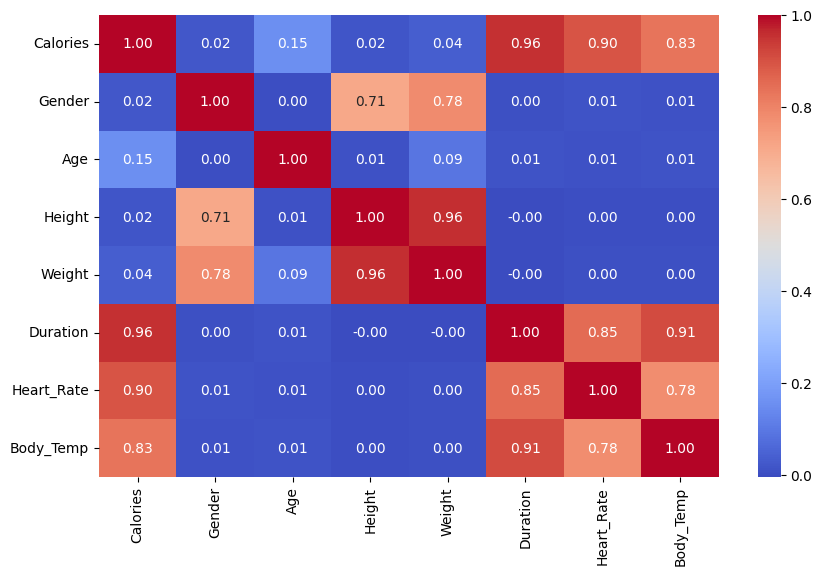

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(df_after_clip.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

### **Defining Features and Target**
This section defines the independent variables (features) and the dependent variable (target) for the machine learning model. By separating the features from the target, the data is properly structured for training and evaluating the model.

In [37]:
X = df_after_clip[["Age", "Gender", "Height", "Weight", "Duration", "Heart_Rate", "Body_Temp"]]
y = df_after_clip[["Calories"]]



### **Splitting Data & Normality Test**
This section is dedicated to preparing the dataset for model training. The data is first split into training and testing sets to ensure the model can be accurately evaluated on unseen data. Additionally, a normality test is performed to determine the distribution of the features, which can help in selecting appropriate statistical methods or machine learning models. The data is then reshaped to fit the input requirements of the models.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
X = np.nan_to_num(X, nan=0)
y = np.nan_to_num(y, nan=0)


In [41]:
from scipy.stats import shapiro

Normal = []
c = 0

for a in df_after_clip.columns:
    if df_after_clip[a].dtype=='int64' or df_after_clip[a].dtype=='float64':
        c += 1
        non_null_data = df_after_clip[a].dropna()
        if len(non_null_data) == 0:
            print(f"Skipping {a}, no data available")
            continue

        sample = non_null_data.sample(n=5000, random_state=42) if len(non_null_data) > 5000 else non_null_data
        stat, p = shapiro(sample)
        if p > 0.05:
            Normal.append(a)

if c == len(Normal):
    print('Distribusi Normal')
else:
    print('Tidak Distribusi Normal')


Tidak Distribusi Normal


In [42]:
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

### **Scaling the Data**
The data is scaled to ensure that all features and the target variable have a similar range. This process is crucial for preventing certain machine learning algorithms from giving disproportionate importance to features with larger values.

In [43]:
# scaler_X, scaler_y = MinMaxScaler(), MinMaxScaler()

# def scaling(X1,X2,y1,y2,scaler_X,scaler_y):
#     X1 = scaler_X.fit_transform(X1)
#     X2 = scaler_X.transform(X2)
#     y1 = scaler_y.fit_transform(y1)
#     y2 = scaler_y.transform(y2)
#     return X1,X2,y1,y2,scaler_X,scaler_y



scaler_X, scaler_y = MinMaxScaler(), MinMaxScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)


### **Handling NaN Values**
This code block handles any remaining NaN values in the scaled training and testing data. By converting these NaN values to zero, it ensures the dataset is complete, preventing errors during the model training process.

In [44]:

X_train = np.nan_to_num(X_train, nan=0)
X_test  = np.nan_to_num(X_test, nan=0)
y_train = np.nan_to_num(y_train, nan=0)
y_test  = np.nan_to_num(y_test, nan=0)


print(np.isnan(X_train).sum(), np.isnan(y_train).sum())


0 0


### **Model Training and Evaluation**
Several regression models are trained and evaluated to assess their predictive performance. A comparison of key metrics like MSE, MAE, RMSE, and R-squared is performed to identify the most suitable model for the task.

In [45]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"Melatih model: {name}")

    model.fit(X_train, y_train.ravel())
    
    y_pred = model.predict(X_test)
    
    y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
    y_test_original = scaler_y.inverse_transform(y_test)
    
    mse = mean_squared_error(y_test_original, y_pred_original)
    mae = mean_absolute_error(y_test_original, y_pred_original)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_original, y_pred_original)
    
   
    results[name] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R2 Score': r2}
    
    print(f"Finish. MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2 Score: {r2:.4f}\n")


print("============================")
print("Result Model")
print("============================")
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  MAE: {metrics['MAE']:.4f}")
    print(f"  RMSE: {metrics['RMSE']:.4f}")
    print(f"  R2 Score: {metrics['R2 Score']:.4f}")
    print("-" * 20)


Melatih model: Linear Regression
Finish. MSE: 131.1817, MAE: 8.4061, RMSE: 11.4535, R2 Score: 0.9661

Melatih model: Random Forest
Finish. MSE: 8.4626, MAE: 1.7391, RMSE: 2.9091, R2 Score: 0.9978

Melatih model: Gradient Boosting
Finish. MSE: 13.7442, MAE: 2.6951, RMSE: 3.7073, R2 Score: 0.9965

Melatih model: XGBoost
Finish. MSE: 4.4091, MAE: 1.4391, RMSE: 2.0998, R2 Score: 0.9989

Result Model
Model: Linear Regression
  MSE: 131.1817
  MAE: 8.4061
  RMSE: 11.4535
  R2 Score: 0.9661
--------------------
Model: Random Forest
  MSE: 8.4626
  MAE: 1.7391
  RMSE: 2.9091
  R2 Score: 0.9978
--------------------
Model: Gradient Boosting
  MSE: 13.7442
  MAE: 2.6951
  RMSE: 3.7073
  R2 Score: 0.9965
--------------------
Model: XGBoost
  MSE: 4.4091
  MAE: 1.4391
  RMSE: 2.0998
  R2 Score: 0.9989
--------------------


### **Model Evaluation and Visualization**
This section evaluates the final model's performance on the test data and visualizes its predictive accuracy. The code predicts calorie burn using the trained model, then calculates key metrics and generates a scatter plot comparing the predicted values against the actual values to provide a clear visual representation of the model's performance.

In [46]:

best_model = XGBRegressor(random_state=42)
best_model.fit(X_train, y_train.ravel())

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [47]:

y_pred_best = best_model.predict(X_test)



In [48]:

y_pred_best_original = scaler_y.inverse_transform(y_pred_best.reshape(-1, 1))
y_test_original = scaler_y.inverse_transform(y_test)

Mean Squared Error: 4.4091123551116445
Root Mean Squared Error: 2.0997886453430605
Mean Absolute Error: 1.439099950666229
R2 Score: 0.9988616047483155


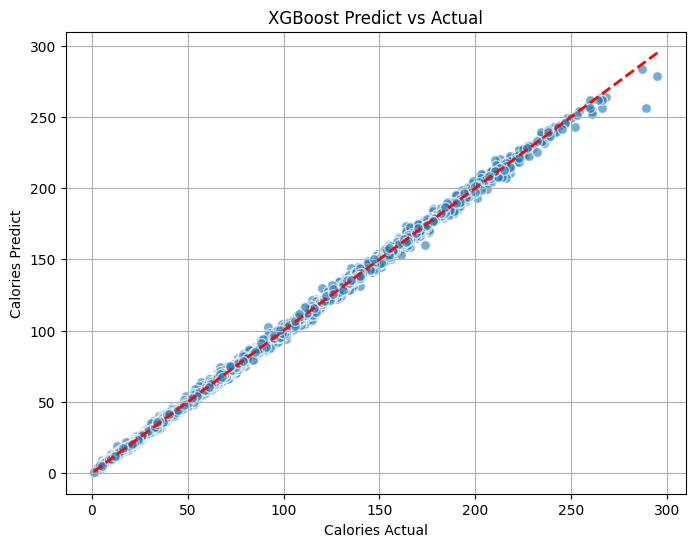

In [49]:
print('Mean Squared Error:',mean_squared_error(y_test_original,y_pred_best_original))
print('Root Mean Squared Error:',root_mean_squared_error(y_test_original,y_pred_best_original))
print('Mean Absolute Error:',mean_absolute_error(y_test_original,y_pred_best_original))
print('R2 Score:',r2_score(y_test_original,y_pred_best_original))

plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_best_original, alpha=0.6, edgecolors='w', s=50)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.title('XGBoost Predict vs Actual')
plt.xlabel('Calories Actual')
plt.ylabel('Calories Predict')
plt.grid(True)
plt.show()

### **Saving the Model and Scalers**
The final step is to save the trained model and the scalers to pickle (.pkl) files. This action ensures that the model can be used later in other applications without the need for retraining, which is crucial for deploying the model in a production environment like a web application.

In [50]:
import joblib

joblib.dump(best_model, 'model.pkl')
joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')


['scaler_y.pkl']

In [51]:
model = joblib.load("model.pkl")
print("Model loaded ✅")
scaler_X = joblib.load("scaler_X.pkl")
scaler_y = joblib.load("scaler_y.pkl")
print("Scalers loaded ✅")


Model loaded ✅
Scalers loaded ✅
